In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

## importing air quality prediction dataset
- The dataset has 5 features predict the air quality using these 5 features

In [2]:
df = pd.read_csv('/Users/mananmehta/Downloads/Train 4.csv')

In [3]:
df.head()

,feature_1,feature_2,feature_3,feature_4,feature_5,target
0,0.293416,-0.945599,-0.421105,0.406816,0.525662,-82.154667
1,-0.836084,-0.189228,-0.776403,-1.053831,0.597997,-48.897960
2,0.236425,0.132836,-0.147723,0.699854,-0.187364,77.270371
3,0.175312,0.143194,-0.581111,-0.122107,-1.292168,-2.988581
4,-1.693011,0.542712,-2.798729,-0.686723,1.244077,-37.596722


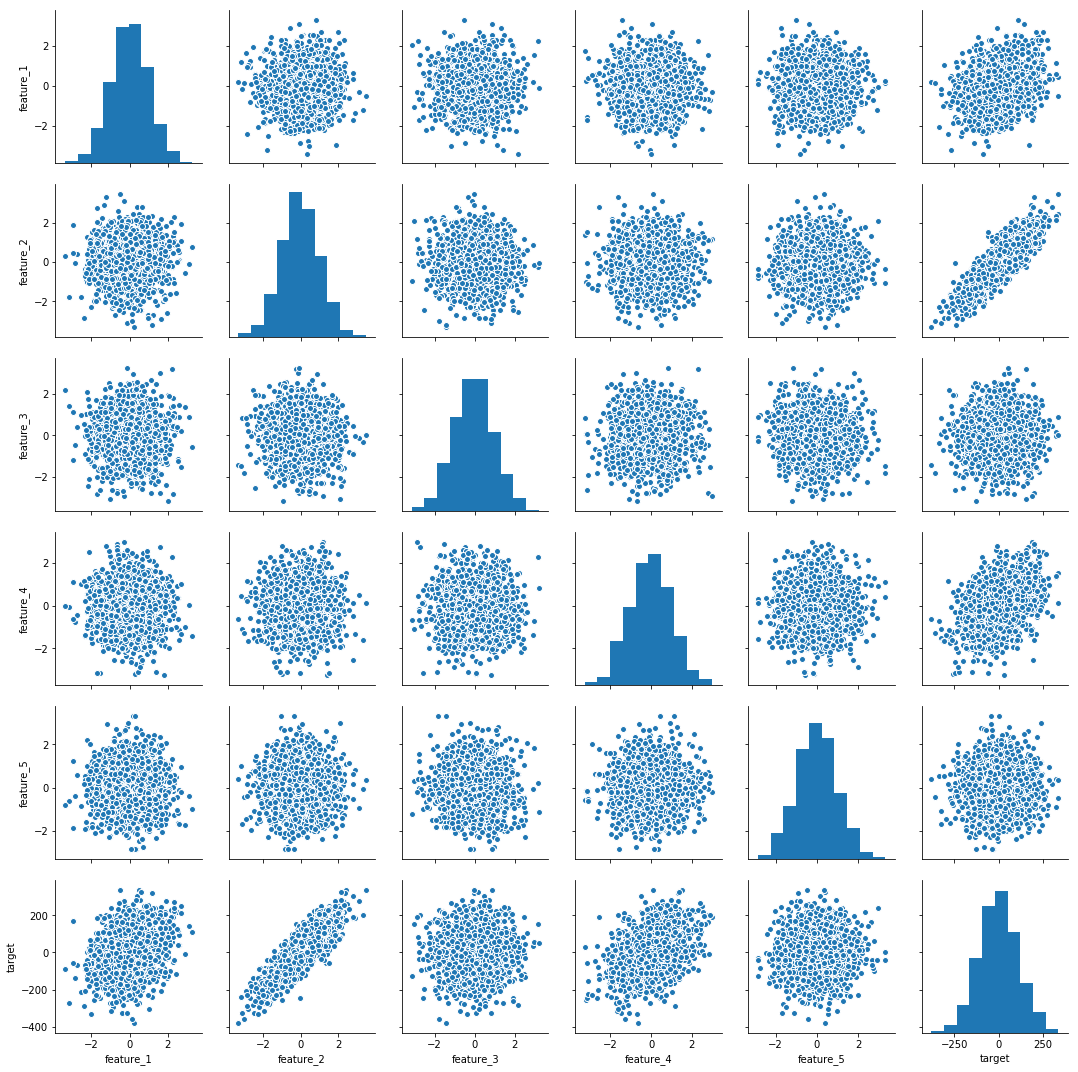

In [4]:
sns.pairplot(df)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1600 entries, 0 to 1599
Data columns (total 6 columns):
feature_1    1600 non-null float64
feature_2    1600 non-null float64
feature_3    1600 non-null float64
feature_4    1600 non-null float64
feature_5    1600 non-null float64
target       1600 non-null float64
dtypes: float64(6)
memory usage: 75.1 KB


In [6]:
df = df.values # converting to numpy array

In [7]:
type(df)

numpy.ndarray

In [8]:
X_train = df[:,:-1]

In [9]:
one = np.ones((X_train.shape[0],1))

In [10]:
X_train = np.hstack([one,X_train])

In [11]:
X_train

array([[ 1.        ,  0.29341624, -0.94559871, -0.42110515,  0.40681602,
         0.52566183],
       [ 1.        , -0.83608408, -0.18922804, -0.77640262, -1.05383124,
         0.59799685],
       [ 1.        ,  0.23642511,  0.13283602, -0.14772298,  0.69985396,
        -0.18736416],
       ...,
       [ 1.        ,  1.04417694, -0.89920649,  1.73039905, -1.87105676,
         0.44251965],
       [ 1.        , -1.2691729 , -0.00505216,  1.85766873, -1.08036482,
         0.73633394],
       [ 1.        , -1.88400025, -0.84942743, -1.45227035,  0.48861308,
         1.4595758 ]])

In [12]:
Y_train = df[:,-1]

In [13]:
X_train.shape

(1600, 6)

In [14]:
Y_train.shape

(1600,)

## function to create hypothesis

In [15]:
def hypothesis(theta,x):
    return np.dot(theta.T,x)

In [16]:
def loss(x,y,theta): # calculates loss
    m = x.shape[0]
    error = 0
    for i in range(m):
        y_hat = hypothesis(theta,x[i])
        error += (y_hat - y[i])**2
       
    return error* (1/2)

In [17]:
def gradient(x,y,theta): # calculate gradient
    grad = np.zeros((x.shape[1],))
    m = x.shape[0]
    n = x.shape[1]
    for i in range(m):
        y_hat = hypothesis(theta,x[i])
        for j in range(n):
            grad[j] += (y_hat - y[i])*x[i][j]
    
    return grad

In [18]:
def train(x,y,lr = 0.0001,epochs = 100): 
    theta = np.zeros((x.shape[1]))
    error_list = []
    for i in range(epochs):
        grad = gradient(x,y,theta)
        theta = theta - lr*grad
        e = loss(x,y,theta)
        error_list.append(e)
       
    return error_list,theta

In [19]:
e_list,theta = train(X_train,Y_train)

## Plot of loss vs iterations
- seems like the model is performing well

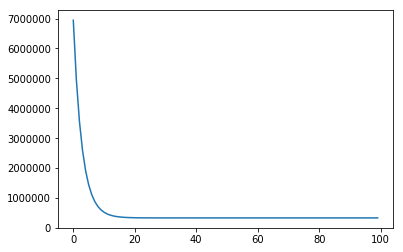

In [20]:
plt.plot(e_list)

## values of weights (theta)

In [21]:
theta

array([ 4.99096268, 29.68186906, 92.66247458,  8.28061616, 44.76773233,
        2.51915789])